<a href="https://colab.research.google.com/github/jobende-OSU/CS4783-Assignment4/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import exp
from sklearn.tree import DecisionTreeClassifier, plot_tree
from google.colab import drive
drive.mount('/content/drive')

train_data = pd.read_excel("/content/drive/MyDrive/Asssignment4_Data.xlsx", "Train")
test_data = pd.read_excel("/content/drive/MyDrive/Asssignment4_Data.xlsx", "Test")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Question 1

## Part 1

We need to calculate the conditional probability distribution for local price, bathrooms, land area, living area, the number of garages, the number of rooms, the number of bedrooms, and the age of the home.

Let's walk through the calculations of two of these in depth, as they all follow the same process. 

In order to save some time, all discussed intermediate steps were individually calculated using a summation calculator and the scientific calculator automatically presented by Google when typing in a basic equation.

#### Local Price

Because this data is continuous, we need to assume it follows a normal distribution and model it based on that.

Thus the formula we will use for calculating the conditional probability is $\hat{P}(X_j | C = c_i)=\frac{1}{\sqrt{2\pi}\sigma_{ji}}\exp{\left(-\frac{(X_j-\mu_{ji})^2}{2\sigma^2_{ji}}\right)}$.

To use this formula, we first need to find the sample mean and sample standard deviation of the local price for houses, condos, and apartments.

$\mu_{\mathit{house}}=\frac{\sum{x_i}}{7}= 5.760742857$

$\sum_{i=1}^{7}(x_i-\mu_{\mathit{house}})^2 = 1.950229577$

$s_{\mathit{house}}=\sqrt{\frac{1}{6}*\sum_{i=1}^{7}(x_i-\mu_{\mathit{house}})^2}=0.570121270$

$\mu_{\mathit{condo}}=\frac{\sum{x_i}}{6}=7.4159$

$\sum_{i=1}^{6}(x_i-\mu_{\mathit{condo}})^2 = 106.31803404$

$s_{\mathit{condo}}=\sqrt{\frac{1}{5}*\sum_{i=1}^{6}(x_i-\mu_{\mathit{condo}})^2}=4.611247858$

$\mu_{\mathit{apartment}}=\frac{\sum{x_i}}{7}=7.332742857$

$\sum_{i=1}^{7}(x_i-\mu_{\mathit{apartment}})^2 = 78.452616037$

$s_{\mathit{apartment}}=\sqrt{\frac{1}{6}*\sum_{i=1}^{7}(x_i-\mu_{\mathit{apartment}})^2}=3.615997235$

After doing the calculations, we find that houses have a sample mean and sample standard deviation of 5.760742857 and 0.570121270, condos have 7.4159 and 4.611247858, and apartments have 7.332743857 and 3.615997235.

With these values, we can finally rewrite and simplify the equation for our probabilities as follows.

$\hat{P}(X | \mathit{house})=\frac{1}{\sqrt{2\pi}s_{\mathit{house}}}\exp{\left(-\frac{(X-\mu_{\mathit{house}})^2}{2s^2_{\mathit{house}}}\right)}$

$\hat{P}(X | \mathit{house})=0.69974986269*\exp{\left(-\frac{(X-5.760742857)^2}{0.65007652501}\right)}$

$\hat{P}(X | \mathit{condo})=\frac{1}{\sqrt{2\pi}s_{\mathit{condo}}}\exp{\left(-\frac{(X-\mu_{\mathit{condo}})^2}{2s^2_{\mathit{condo}}}\right)}$

$\hat{P}(X | \mathit{condo})=0.08651503729*\exp{\left(-\frac{(X-7.4159)^2}{42.5272136158}\right)}$

$\hat{P}(X | \mathit{apartment})=\frac{1}{\sqrt{2\pi}s_{\mathit{apartment}}}\exp{\left(-\frac{(X-\mu_{\mathit{apartment}})^2}{2s^2_{\mathit{apartment}}}\right)}$

$\hat{P}(X | \mathit{apartment})=0.11032704243*\exp{\left(-\frac{(X-7.332742857)^2}{26.1508720071}\right)}$

#### Bathrooms

Again, we must use assume a normal distribution and use $\hat{P}(X_j | C = c_i)=\frac{1}{\sqrt{2\pi}\sigma_{ji}}\exp{\left(-\frac{(X_j-\mu_{ji})^2}{2\sigma^2_{ji}}\right)}$ as our formula for the conditional probabilities, which requires us to find the means and standard deviations for each class.

$\mu_{\mathit{house}}=\frac{\sum{x_i}}{7}=1.071428571$

$\sum_{i=1}^{7}(x_i-\mu_{\mathit{house}})^2=0.214285714$

$s_{\mathit{house}}=\sqrt{\frac{1}{6}*\sum_{i=1}^{7}(x_i-\mu_{\mathit{house}})^2}=0.188982237$

$\mu_{\mathit{condo}}=\frac{\sum{x_i}}{6}=1.333333333$

$\sum_{i=1}^{6}(x_i-\mu_{\mathit{condo}})^2 = 1.833333333$

$s_{\mathit{condo}}=\sqrt{\frac{1}{5}*\sum_{i=1}^{6}(x_i-\mu_{\mathit{condo}})^2}=0.605530071$

$\mu_{\mathit{apartment}}=\frac{\sum{x_i}}{7}=1.285714286$

$\sum_{i=1}^{7}(x_i-\mu_{\mathit{apartment}})^2=1.928571429$

$s_{\mathit{apartment}}=\sqrt{\frac{1}{6}*\sum_{i=1}^{7}(x_i-\mu_{\mathit{apartment}})^2}=0.566946710$

After the calculations, we find that the sample mean and sample deviation for bathrooms in houses is 1.071428571 and 0.188982237, in condos it's 1.333333333 and 0.605530071, and in apartments it's 1.285714286 and 0.566946710.

We can now use these in our formula to rewrite it as such.

$\hat{P}(X | \mathit{house})=\frac{1}{\sqrt{2\pi}s_{\mathit{house}}}\exp{\left(-\frac{(X-\mu_{\mathit{house}})^2}{2s^2_{\mathit{house}}}\right)}$

$\hat{P}(X | \mathit{house})=2.11100411729*\exp{\left(-\frac{(X-1.071428571)^2}{0.0714285718}\right)}$

$\hat{P}(X | \mathit{condo})=\frac{1}{\sqrt{2\pi}s_{\mathit{condo}}}\exp{\left(-\frac{(X-\mu_{\mathit{condo}})^2}{2s^2_{\mathit{condo}}}\right)}$

$\hat{P}(X | \mathit{condo})=0.65883149245*\exp{\left(-\frac{(X-1.333333333)^2}{0.73333333377}\right)}$

$\hat{P}(X | \mathit{apartment})=\frac{1}{\sqrt{2\pi}s_{\mathit{apartment}}}\exp{\left(-\frac{(X-\mu_{\mathit{apartment}})^2}{2s^2_{\mathit{apartment}}}\right)}$

$\hat{P}(X | \mathit{apartment})=0.70366804033*\exp{\left(-\frac{(X-1.285714286)^2}{0.64285714396}\right)}$

Following the same method we used for these first two features, we find the conditional probabilities for the remaining features as seen below.

#### Land Area

$\mu_{\mathit{house}}=6.6309$

$s_{\mathit{house}}=2.248932183$

$\mu_{\mathit{condo}}=6.024666667$

$s_{\mathit{condo}}=2.544777371$

$\mu_{\mathit{apartment}}=6.103857143$

$s_{\mathit{apartment}}=3.258509497$

$\hat{P}(X | \mathit{house})=0.17739186775*\exp{\left(-\frac{(X-6.6309)^2}{10.1153919275}\right)}$

$\hat{P}(X | \mathit{condo})=0.15676903015*\exp{\left(-\frac{(X-6.024666667)^2}{12.9517837359}\right)}$

$\hat{P}(X | \mathit{apartment})=0.12243090921*\exp{\left(-\frac{(X-6.103857143)^2}{21.2357682841}\right)}$

#### Living Area

$\mu_{\mathit{house}}=1.391714286$

$s_{\mathit{house}}=0.212923863$

$\mu_{\mathit{condo}}=1.553333333$

$s_{\mathit{condo}}=0.923441317$

$\mu_{\mathit{apartment}}=1.505$

$s_{\mathit{apartment}}=0.704105816$

$\hat{P}(X | \mathit{house})=1.87363818588*\exp{\left(-\frac{(X-1.391714286)^2}{0.09067314286}\right)}$

$\hat{P}(X | \mathit{condo})=0.43201692739*\exp{\left(-\frac{(X-1.553333333)^2}{1.70548773189}\right)}$

$\hat{P}(X | \mathit{apartment})=0.56659421259*\exp{\left(-\frac{(X-1.505)^2}{0.99153000025}\right)}$

#### Number of Garages

$\mu_{\mathit{house}}=1.071428571$

$s_{\mathit{house}}=0.838081710$

$\mu_{\mathit{condo}}=1.333333333$

$s_{\mathit{condo}}=0.516397779$

$\mu_{\mathit{apartment}}=1.214285714$

$s_{\mathit{apartment}}=0.698638131$

$\hat{P}(X | \mathit{house})=0.47601835911*\exp{\left(-\frac{(X-1.071428571)^2}{1.40476190527}\right)}$

$\hat{P}(X | \mathit{condo})=0.77254840478*\exp{\left(-\frac{(X-1.333333333)^2}{0.53333333231}\right)}$

$\hat{P}(X | \mathit{apartment})=0.57102849486*\exp{\left(-\frac{(X-1.214285714)^2}{0.97619047617}\right)}$

#### Number of Rooms

$\mu_{\mathit{house}}=6.142857143$

$s_{\mathit{house}}=0.690065559$

$\mu_{\mathit{condo}}=6.833333333$

$s_{\mathit{condo}}=1.602081979$

$\mu_{\mathit{apartment}}=6.857142857$

$s_{\mathit{apartment}}=1.3451185418$

$\hat{P}(X | \mathit{house})=0.57812228881*\exp{\left(-\frac{(X-6.142857143)^2}{0.95238095143}\right)}$

$\hat{P}(X | \mathit{condo})=0.24901489788*\exp{\left(-\frac{(X-6.833333333)^2}{5.13333333487}\right)}$

$\hat{P}(X | \mathit{apartment})=0.2965852213*\exp{\left(-\frac{(X-6.857142857)^2}{3.61868778299}\right)}$

#### Number of Bedrooms

$\mu_{\mathit{house}}=3$

$s_{\mathit{house}}=0.577350269$

$\mu_{\mathit{condo}}=3.333333333$

$s_{\mathit{condo}}=0.816496581$

$\mu_{\mathit{apartment}}=3.428571429$

$s_{\mathit{apartment}}=0.975900073$

$\hat{P}(X | \mathit{house})=0.69098829917*\exp{\left(-\frac{(X-3)^2}{0.66666666622}\right)}$

$\hat{P}(X | \mathit{condo})=0.48860251186*\exp{\left(-\frac{(X-3.333333333)^2}{1.33333333357}\right)}$

$\hat{P}(X | \mathit{apartment})=0.40879419055*\exp{\left(-\frac{(X-3.428571429)^2}{1.90476190496}\right)}$

#### Age of Home

$\mu_{\mathit{house}}=34.285714286$

$s_{\mathit{house}}=12.724180206$

$\mu_{\mathit{condo}}=39.666666667$

$s_{\mathit{condo}}=13.952299691$

$\mu_{\mathit{apartment}}=38.714285714$

$s_{\mathit{apartment}}=14.682350921$

$\hat{P}(X | \mathit{house})=0.03135308318*\exp{\left(-\frac{(X-34.285714286)^2}{323.80952383}\right)}$

$\hat{P}(X | \mathit{condo})=0.02859329925*\exp{\left(-\frac{(X-39.666666667)^2}{389.333333335}\right)}$

$\hat{P}(X | \mathit{apartment})=0.02717155328*\exp{\left(-\frac{(X-38.714285714)^2}{431.142857135}\right)}$

## Part 2

In [2]:
condProbValues = {
    "Local Price" : {
        "House" : (0.69974986269, 5.760742857, 0.65007652501),
        "Condo" : (0.08651503729, 7.4159, 42.5272136158),
        "Apartment" : (0.11032704243, 7.332742857, 26.1508720071)
    },
    "Bathrooms" : {
        "House" : (2.11100411729, 1.071428571, 0.0714285718),
        "Condo" : (0.65883149245, 1.333333333, 0.73333333377),
        "Apartment" : (0.70366804033, 1.285714286, 0.64285714396)
    },
    "Land Area" : {
        "House" : (0.17739186775, 6.6309, 10.1153919275),
        "Condo" : (0.15676903015, 6.024666667, 12.9517837359),
        "Apartment" : (0.12243090921, 6.103857143, 21.2357682841)
    },
    "Living area" : {
        "House" : (1.87363818588, 1.391714286, 0.09067314286),
        "Condo" : (0.43201692739, 1.553333333, 1.70548773189),
        "Apartment" : (0.56659421259, 1.505, 0.99153000025)
    },
    "# Garages" : {
        "House" : (0.47601835911, 1.071428571, 1.40476190527),
        "Condo" : (0.77254840478, 1.333333333, 0.53333333231),
        "Apartment" : (0.57102849486, 1.214285714, 0.97619047617)
    },
    "# Rooms" : {
        "House" : (0.57812228881, 6.142857143, 0.95238095143),
        "Condo" : (0.24901489788, 6.833333333, 5.13333333487),
        "Apartment" : (0.2965852213, 6.857142857, 3.61868778299)
    },
    "# Bedrooms" : {
        "House" : (0.69098829917, 3, 0.66666666622),
        "Condo" : (0.48860251186, 3.333333333, 1.33333333357),
        "Apartment" : (0.40879419055, 3.428571429, 1.90476190496)
    },
    "Age of home" : {
        "House" : (0.03135308318, 34.285714286, 323.80952383),
        "Condo" : (0.02859329925, 39.666666667, 389.333333335),
        "Apartment" : (0.02717155328, 38.714285714, 431.142857135)
    },
}

totalProbValues = {
    "House" : 7.0/20,
    "Condo" : 6.0/20,
    "Apartment" : 7.0/20
}

features = ['Local Price', 'Bathrooms', 'Land Area', 'Living area', 
            '# Garages', '# Rooms', '# Bedrooms', 'Age of home']
labels = ['House', 'Condo', 'Apartment']

In [3]:
def calculateProbability(x, feature, label):
  values = condProbValues[feature][label]
  return values[0] * exp(-pow(x[feature] - values[1], 2) / values[2])

def mapClassify(example):
  labelProbabilities = []
  for label in labels:
    labelProbabilities.append(np.prod([calculateProbability(example, feature, 
      label) for feature in features]) * totalProbValues[label])
  classification = labelProbabilities.index(max(labelProbabilities))
  return classification, labelProbabilities

In [4]:
for i in range(len(test_data)):
  example = test_data.iloc[i]
  classification, probabilities = mapClassify(example)
  houseId = example['House ID']
  print(f'House {houseId}:\n' + 
        f'\tHouse = {probabilities[0]}\n' +
        f'\tCondo = {probabilities[1]}\n' +
        f'\tApartment = {probabilities[2]}\n' +
        f'\tMAP Classification is {labels[classification]}')

House 24:
	House = 2.2783761468606152e-05
	Condo = 1.711734160314212e-06
	Apartment = 1.9822059109403403e-06
	MAP Classification is House
House 25:
	House = 4.480055701344146e-13
	Condo = 2.6791172915771636e-07
	Apartment = 4.85577615019007e-07
	MAP Classification is Apartment
House 26:
	House = 1.3881285442430965e-09
	Condo = 2.4566703623555982e-08
	Apartment = 6.403182003877926e-08
	MAP Classification is Apartment
House 27:
	House = 1.0402164147952439e-15
	Condo = 1.008087240120738e-06
	Apartment = 1.1475612827233422e-06
	MAP Classification is Apartment
House 28:
	House = 1.978270158939522e-31
	Condo = 4.305093217703079e-07
	Apartment = 4.074411250313946e-07
	MAP Classification is Condo


# Question 2

In [5]:
train_data_x, test_data_x = train_data.drop(columns=['Construction type', 'House ID']), test_data.drop(columns=['Construction type', 'House ID'])
train_data_y, test_data_y = train_data['Construction type'], test_data['Construction type']

train_data_x = np.reshape(train_data_x.values, (train_data_x.shape[0], -1))
train_data_y = np.reshape(train_data_y.values, -1)
test_data_x = np.reshape(test_data_x.values, (test_data_x.shape[0], -1))
test_data_y = np.reshape(test_data_y.values, -1)

## Part 1

In [6]:
tree = DecisionTreeClassifier()
tree.fit(train_data_x, train_data_y)

DecisionTreeClassifier()

In [7]:
predictions = tree.predict(test_data_x)
for i in range(len(test_data_y)):
  print(f'Predicted: {predictions[i]}\tExpected: {test_data_y[i]}')

Predicted: Condo	Expected: Apartment
Predicted: Condo	Expected: House
Predicted: Condo	Expected: House
Predicted: Apartment	Expected: Apartment
Predicted: Apartment	Expected: Apartment


#### Part A

In [8]:
print(f'Accuracy: {tree.score(train_data_x, train_data_y):%}')

Accuracy: 100.000000%


Using default parameters, it has 100% accuracy on the training set. This is expected since it would have gone to as far of a depth as to ensure every possible feature and example was considered and overfitted to.

#### Part B

In [9]:
print(f'Accuracy: {tree.score(test_data_x, test_data_y):%}')

Accuracy: 40.000000%


Using default parameters, it has a 40% accuracy on the test set. This is expected since the default settings do not have any regularization and thus allowed the tree to overfit to the training set.

## Part 2

In [10]:
for depth in range(1, 6):
  tree = DecisionTreeClassifier(max_depth=depth)
  tree.fit(train_data_x, train_data_y)
  print(f'Depth {depth}:')
  print(f'\tTraining Accuracy: {tree.score(train_data_x, train_data_y):%}')
  print(f'\t Testing Accuracy: {tree.score(test_data_x, test_data_y):%}')

Depth 1:
	Training Accuracy: 55.000000%
	 Testing Accuracy: 40.000000%
Depth 2:
	Training Accuracy: 75.000000%
	 Testing Accuracy: 80.000000%
Depth 3:
	Training Accuracy: 90.000000%
	 Testing Accuracy: 40.000000%
Depth 4:
	Training Accuracy: 95.000000%
	 Testing Accuracy: 40.000000%
Depth 5:
	Training Accuracy: 100.000000%
	 Testing Accuracy: 40.000000%


Restricting the maximum depth of the tree has a profound effect on its generalization. After testing the depths between 1 and 5, a depth of 2 was found to have the best generalization, with an accuracy of 75% on the training set and 80% on the testing set.

## Part 3

Restricting the depth has such an intense effect on the classifier's performance because it prevents it from being able to overfit to the entire training set. There aren't enough splits to consider every feature fully, so it is forced to generalized greatly.

## Part 4

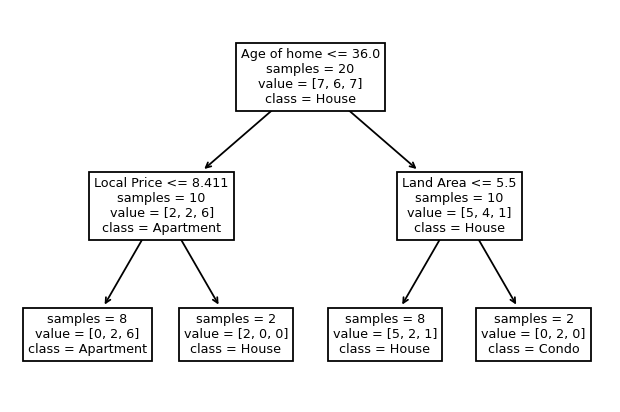

In [11]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(train_data_x, train_data_y)
plt.figure(dpi=128)
plot_tree(tree, feature_names=features, class_names=labels, impurity=False)
pass

Using the example given by the instructions, we can make a classification by tracing its path in the above tree we found in Part 2. Note that the above code can generate two variations of this tree, but the more common one involving age of home, local price, and land area is being used for this classification.

Starting from the root, we check to see if the age of the home is less than or equal to 36, which 23 obviously is, so we head right. We then look to see if land area is less than or equal to 5.5, which 7.8 is not, so we head left. We then reach a leaf node and classify our example as a house.

# Question 3

In [12]:
def euclidean_dist(X, Y):
  return pow(np.sum(pow(X - Y, 2)), 0.5)

def find_neighbors(example, train_x, train_y, k):
  # Get the sorted euclidean distances with all points.
  distances = [(train_y[i], euclidean_dist(example, train_x[i])) for i in range(len(train_x))]
  distances.sort(key=lambda entry: entry[1])
  
  # Get the k closest points as the neighbors.
  neighbors = [distances[i][0] for i in range(k)]
  return neighbors, distances

def kNN_classify(example, train_x, train_y, k):
  neighbors, _ = find_neighbors(example, train_x, train_y, k)
  classes, freq = np.unique(neighbors, return_counts=True)
  prediction = classes[np.argmax(freq)]
  return prediction

def normalize_features(train, test):
  # Get sample means.
  sample_means = [0 for i in range(len(train[0]))]
  for example in train:
    sample_means += example
  sample_means /= float(len(train))

  # Get sample standard deviation.
  summations = [np.sum(pow(train - sample_means, 2))]
  divisions = [sum / float(len(train)) for sum in summations]
  sample_deviations = [pow(division, 0.5) for division in divisions]

  # Normalize the features.
  newTrain = [example / sample_deviations for example in train]
  newTest = [example / sample_deviations for example in test]
  return newTrain, newTest


In [13]:
# Normalize the features since they are of different units.
normal_train, normal_test = normalize_features(train_data_x, test_data_x)

In [14]:
# Make classifications using between 1 and 5 for k.
for k in range(1, 6):
  correct = 0
  print(f'k = {k}:')

  # Classify for each test example.
  for i in range(len(test_data_x)):
    # Get the example and make a classification.
    example = normal_test[i]
    classification = kNN_classify(example, normal_train, train_data_y, k)

    # Print the predicted and expected class for this example.
    houseId = test_data.iloc[i]['House ID']
    print(f'\tHouse {houseId}: Predicted={classification}, Expected={test_data_y[i]}')

    # Keep track of the accuracy for this choice of k.
    if classification == test_data_y[i]:
      correct += 1

  # Print the accuracy for this choice of k.
  print(f'Testing Accuracy: {float(correct) / len(test_data_x):%}\n')

k = 1:
	House 24: Predicted=Apartment, Expected=Apartment
	House 25: Predicted=Apartment, Expected=House
	House 26: Predicted=Apartment, Expected=House
	House 27: Predicted=Condo, Expected=Apartment
	House 28: Predicted=House, Expected=Apartment
Testing Accuracy: 20.000000%

k = 2:
	House 24: Predicted=Apartment, Expected=Apartment
	House 25: Predicted=Apartment, Expected=House
	House 26: Predicted=Apartment, Expected=House
	House 27: Predicted=Condo, Expected=Apartment
	House 28: Predicted=Condo, Expected=Apartment
Testing Accuracy: 20.000000%

k = 3:
	House 24: Predicted=Apartment, Expected=Apartment
	House 25: Predicted=Apartment, Expected=House
	House 26: Predicted=Apartment, Expected=House
	House 27: Predicted=House, Expected=Apartment
	House 28: Predicted=House, Expected=Apartment
Testing Accuracy: 20.000000%

k = 4:
	House 24: Predicted=Apartment, Expected=Apartment
	House 25: Predicted=Apartment, Expected=House
	House 26: Predicted=Apartment, Expected=House
	House 27: Predicted

When using a majority vote for predictions and trying different numbers of neighbors between 1 and 5, we see that the accuracy of predictions on the test set don't change. Internally, increasing the number of neighbors does increase the bias and improve generalization, but the nature of the test data hides this improvement. This is better explained by graphing the Euclidean distances for one of the test examples as seen below.

Distance: 0.3066480580092534	Type: Condo
Distance: 0.31586944775044873	Type: House
Distance: 0.37260037273406765	Type: House
Distance: 0.37260037273406765	Type: House
Distance: 0.3782839506095552	Type: House


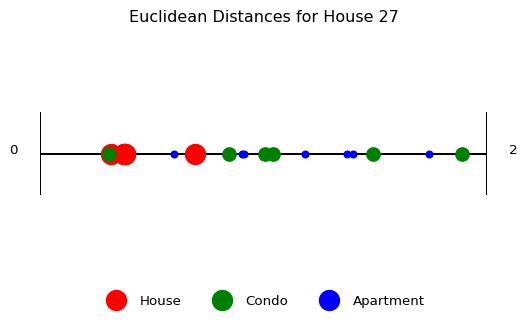

In [17]:
k = 1
example = normal_test[3]
_, distances = find_neighbors(example, normal_train, train_data_y, k)

# Set up the figure.
fig = plt.figure(dpi=96)
ax = fig.add_subplot(111)
ax.set_xlim(0, 2)
ax.set_ylim(3, 6.5)

# Settings for the number line.
xmin = 0
xmax = 2
y = 5
height = 1

# Create the number line.
plt.hlines(y, xmin, xmax)
plt.vlines(xmin, y - height / 2.0, y + height / 2.0)
plt.vlines(xmax, y - height / 2.0, y + height / 2.0)

# Hold a list of colors for each label.
colors = {
    'House':'r', 
    'Condo':'g', 
    'Apartment':'b'
}

# Plot points of specific classes in order so that overlaps can be seen better.
for point in distances:
  if point[0] == 'House':
    plt.plot(point[1], y, 'ro', ms = 15, mfc = colors[point[0]])
for point in distances:
  if point[0] == 'Condo':
    plt.plot(point[1], y, 'go', ms = 10, mfc = colors[point[0]])
for point in distances:
  if point[0] == 'Apartment':
    plt.plot(point[1], y, 'bo', ms = 5, mfc = colors[point[0]])

# Plot fake points out of view for the legend.
plt.plot(-1, y, 'ro', ms = 15, mfc = colors['House'], label='House')
plt.plot(-1, y, 'go', ms = 15, mfc = colors['Condo'], label='Condo')
plt.plot(-1, y, 'bo', ms = 15, mfc = colors['Apartment'], label='Apartment')

# Add in the legend and title.
plt.legend(frameon=False, loc='lower center', ncol=3)
plt.title('Euclidean Distances for House 27')

# Turn off the axis and add labels for each side of the line.
plt.text(xmin - 0.1, y, '0', horizontalalignment='right')
plt.text(xmax + 0.1, y, '2', horizontalalignment='left')
plt.axis('off')

# Print the five closest neighbors.
for neighbor in distances[:5]:
  print(f'Distance: {neighbor[1]}\tType: {neighbor[0]}')

By graphing the Euclidean distances for House 27 on a number line and listing the 5 smallest distances, we can see that the house class is generally closest to it in terms of our metric, which it is accurately generalizing to as we increase the number of compared neighbors. This indicates that our lack of improvement in accuracy comes down to our distance metric being innappropriate for our data, even after applying feature normalization.